In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [2]:
df = pd.read_csv('datasets/TaxiFare.csv')

In [9]:
df.head().style.background_gradient(cmap='ocean')

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.500000,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.900000,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.700000,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.700000,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.300000,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [7]:
# drop unique_id
df.drop(['unique_id'],axis=1,inplace=True)

In [8]:
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [11]:
# check missing values
df.isna().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [12]:
# check duplicates
duplicate = df.duplicated()
print(duplicate.sum())


0


In [19]:
# split the date_time_of_pickup
df['year_of_pickup']=pd.to_datetime(df['date_time_of_pickup']).dt.year
df['day_of_pickup']=pd.to_datetime(df['date_time_of_pickup']).dt.day
df['month_of_pickup']=pd.to_datetime(df['date_time_of_pickup']).dt.month
df['hour_of_pickup']=pd.to_datetime(df['date_time_of_pickup']).dt.hour
df['minute_of_pickup']=pd.to_datetime(df['date_time_of_pickup']).dt.minute
df['second_of_pickup']=pd.to_datetime(df['date_time_of_pickup']).dt.second

In [21]:
# drop date_time_of_pickup
df.drop(['date_time_of_pickup'],axis=1, inplace=True)

In [22]:
df.sample(5).style.background_gradient(cmap='Blues')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year_of_pickup,day_of_pickup,month_of_pickup,hour_of_pickup,minute_of_pickup,second_of_pickup
16702,6.500000,-73.988877,40.744557,-73.984702,40.752932,5,2013,5,4,20,24,0
1512,5.500000,-73.983995,40.768815,-73.985765,40.777082,1,2013,23,11,18,34,0
46684,6.900000,-73.993333,40.742090,-73.969658,40.763736,1,2009,27,9,5,47,27
22299,9.000000,-73.971827,40.759605,-73.979912,40.748667,1,2013,27,11,12,17,0
29296,13.700000,-73.955190,40.764827,-73.960581,40.807424,1,2009,7,5,13,42,51


In [23]:
# descriptive statistics
df.describe().style.background_gradient(cmap='coolwarm')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year_of_pickup,day_of_pickup,month_of_pickup,hour_of_pickup,minute_of_pickup,second_of_pickup
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,2011.739260,15.672040,6.273300,13.489080,29.665420,15.871900
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,1.862639,8.660789,3.461157,6.506935,17.306535,19.429542
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,2010.000000,8.000000,3.000000,9.000000,15.000000,0.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,2012.000000,16.000000,6.000000,14.000000,30.000000,4.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,2013.000000,23.000000,9.000000,19.000000,45.000000,32.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,2015.000000,31.000000,12.000000,23.000000,59.000000,59.000000


### EDA

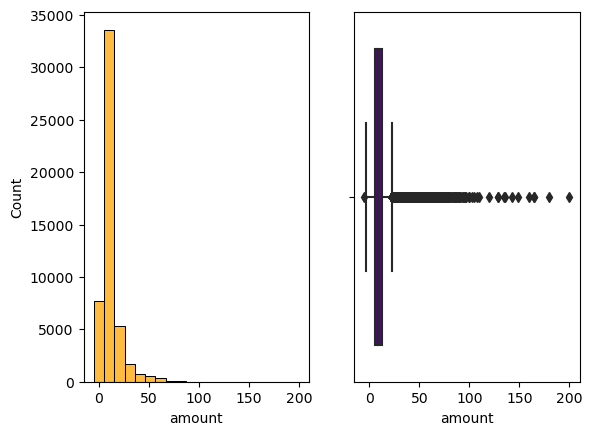

In [28]:
# Visualize the target column, amount column
plt.subplot(121)
sns.histplot(df['amount'], color='orange',bins=20)
plt.subplot(122)
sns.boxplot(x=df['amount'], color='indigo')
plt.show()


- the amount column contain a lot of outliers
- the outliers needs to be treated

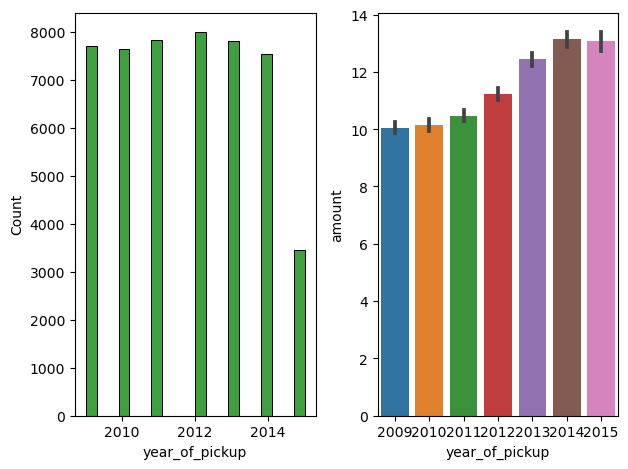

In [46]:
plt.subplot(121)
sns.histplot(df['year_of_pickup'], color='green',bins=20)
plt.subplot(122)
sns.barplot(x=df['year_of_pickup'],y=df['amount'])
plt.tight_layout()

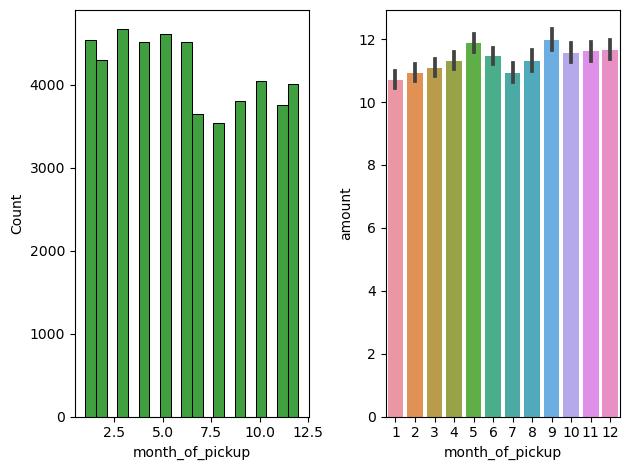

In [47]:
plt.subplot(121)
sns.histplot(df['month_of_pickup'], color='green',bins=20)
plt.subplot(122)
sns.barplot(x=df['month_of_pickup'],y=df['amount'])
plt.tight_layout()

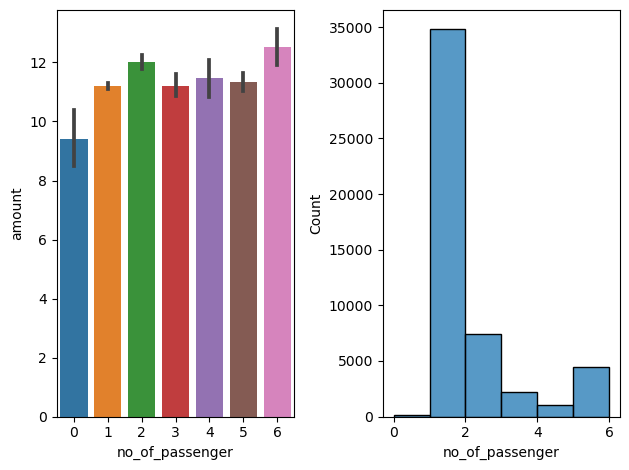

In [53]:

plt.subplot(121)
sns.barplot(x=df['no_of_passenger'],y=df['amount'])
plt.subplot(122)
sns.histplot(x=df['no_of_passenger'],bins=6)
plt.tight_layout()

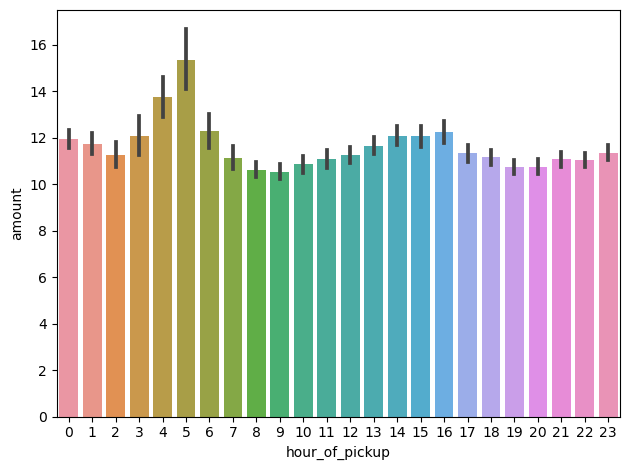

In [59]:
plt.figure('figsize'==(20,20))

sns.barplot(x=df['hour_of_pickup'],y=df['amount'])
plt.tight_layout()

In [64]:
df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year_of_pickup', 'day_of_pickup', 'month_of_pickup', 'hour_of_pickup',
       'minute_of_pickup', 'second_of_pickup'],
      dtype='object')

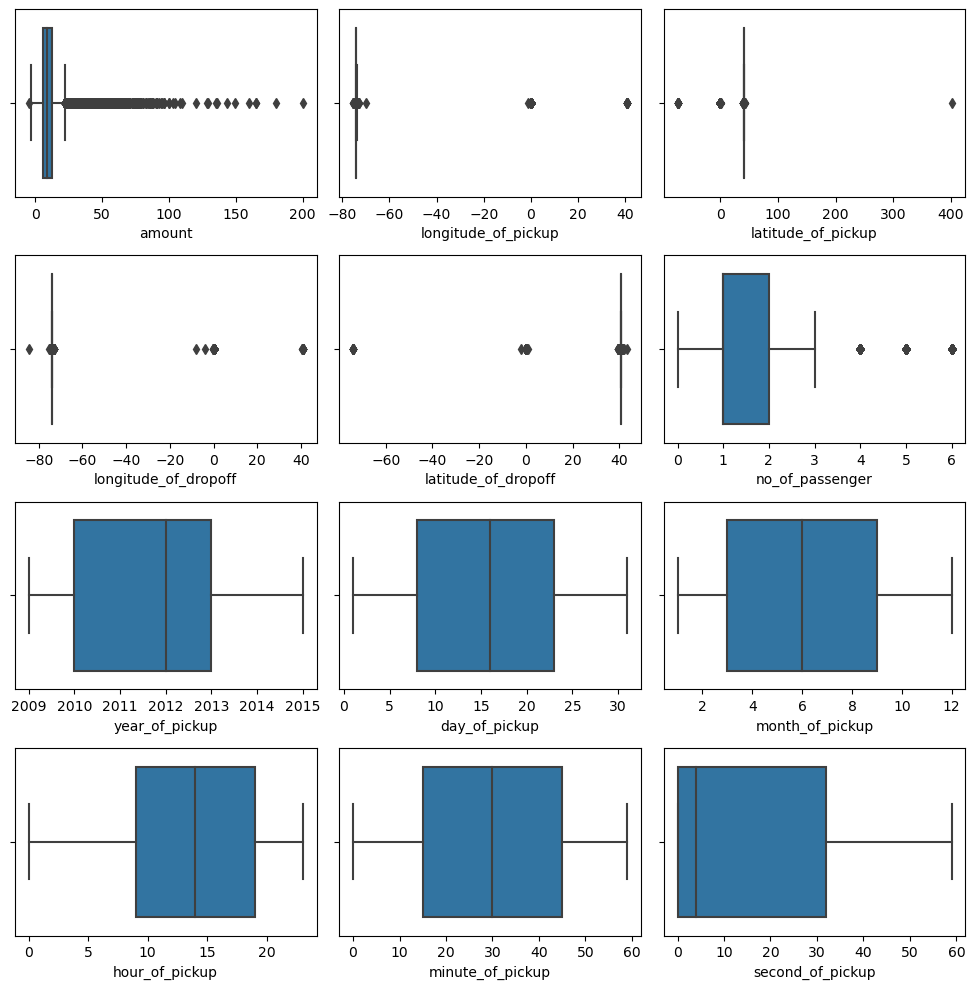

In [69]:
## Check outlier using boxplot
fig,axes =plt.subplots(4,3, figsize=(10,10))
sns.boxplot(x=df['amount'], ax=axes[0,0])
sns.boxplot(x=df['longitude_of_pickup'], ax=axes[0,1])
sns.boxplot(x=df['latitude_of_pickup'], ax=axes[0,2])
sns.boxplot(x=df['longitude_of_dropoff'], ax=axes[1,0])
sns.boxplot(x=df['latitude_of_dropoff'], ax=axes[1,1])
sns.boxplot(x=df['no_of_passenger'], ax=axes[1,2])
sns.boxplot(x=df['year_of_pickup'], ax=axes[2,0])
sns.boxplot(x=df['day_of_pickup'], ax=axes[2,1])
sns.boxplot(x=df['month_of_pickup'], ax=axes[2,2])
sns.boxplot(x=df['hour_of_pickup'], ax=axes[3,0])
sns.boxplot(x=df['minute_of_pickup'], ax=axes[3,1])
sns.boxplot(x=df['second_of_pickup'], ax=axes[3,2])
plt.tight_layout()

In [72]:
### write a function to remove outliers
def remove_outlier(data):
    for col in data.columns:
        q1,q3 = data[col].quantile([0.25,0.75])
        iqr = q3 - q1
        lower = q1 - (1.5*iqr)
        upper =q3 + (1.5*iqr)
        data[col] =np.where(data[col]>upper,upper,data[col])
        data[col] =np.where(data[col]<lower,lower,data[col])
        return data
    

In [73]:
df = remove_outlier(df)

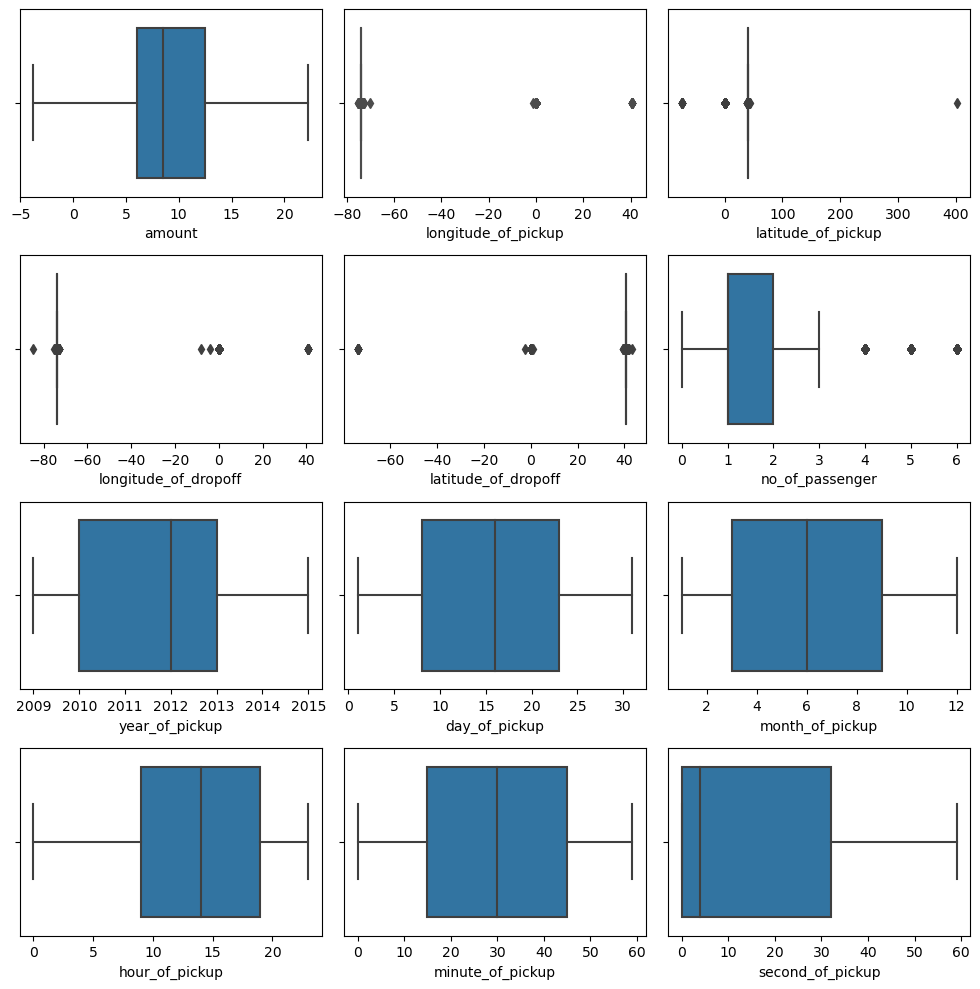

In [75]:
## Check treated outliers using boxplot
fig,axes =plt.subplots(4,3, figsize=(10,10))
sns.boxplot(x=df['amount'], ax=axes[0,0])
sns.boxplot(x=df['longitude_of_pickup'], ax=axes[0,1])
sns.boxplot(x=df['latitude_of_pickup'], ax=axes[0,2])
sns.boxplot(x=df['longitude_of_dropoff'], ax=axes[1,0])
sns.boxplot(x=df['latitude_of_dropoff'], ax=axes[1,1])
sns.boxplot(x=df['no_of_passenger'], ax=axes[1,2])
sns.boxplot(x=df['year_of_pickup'], ax=axes[2,0])
sns.boxplot(x=df['day_of_pickup'], ax=axes[2,1])
sns.boxplot(x=df['month_of_pickup'], ax=axes[2,2])
sns.boxplot(x=df['hour_of_pickup'], ax=axes[3,0])
sns.boxplot(x=df['minute_of_pickup'], ax=axes[3,1])
sns.boxplot(x=df['second_of_pickup'], ax=axes[3,2])
plt.tight_layout()

- Most of the outliers are removed especially in the amount column

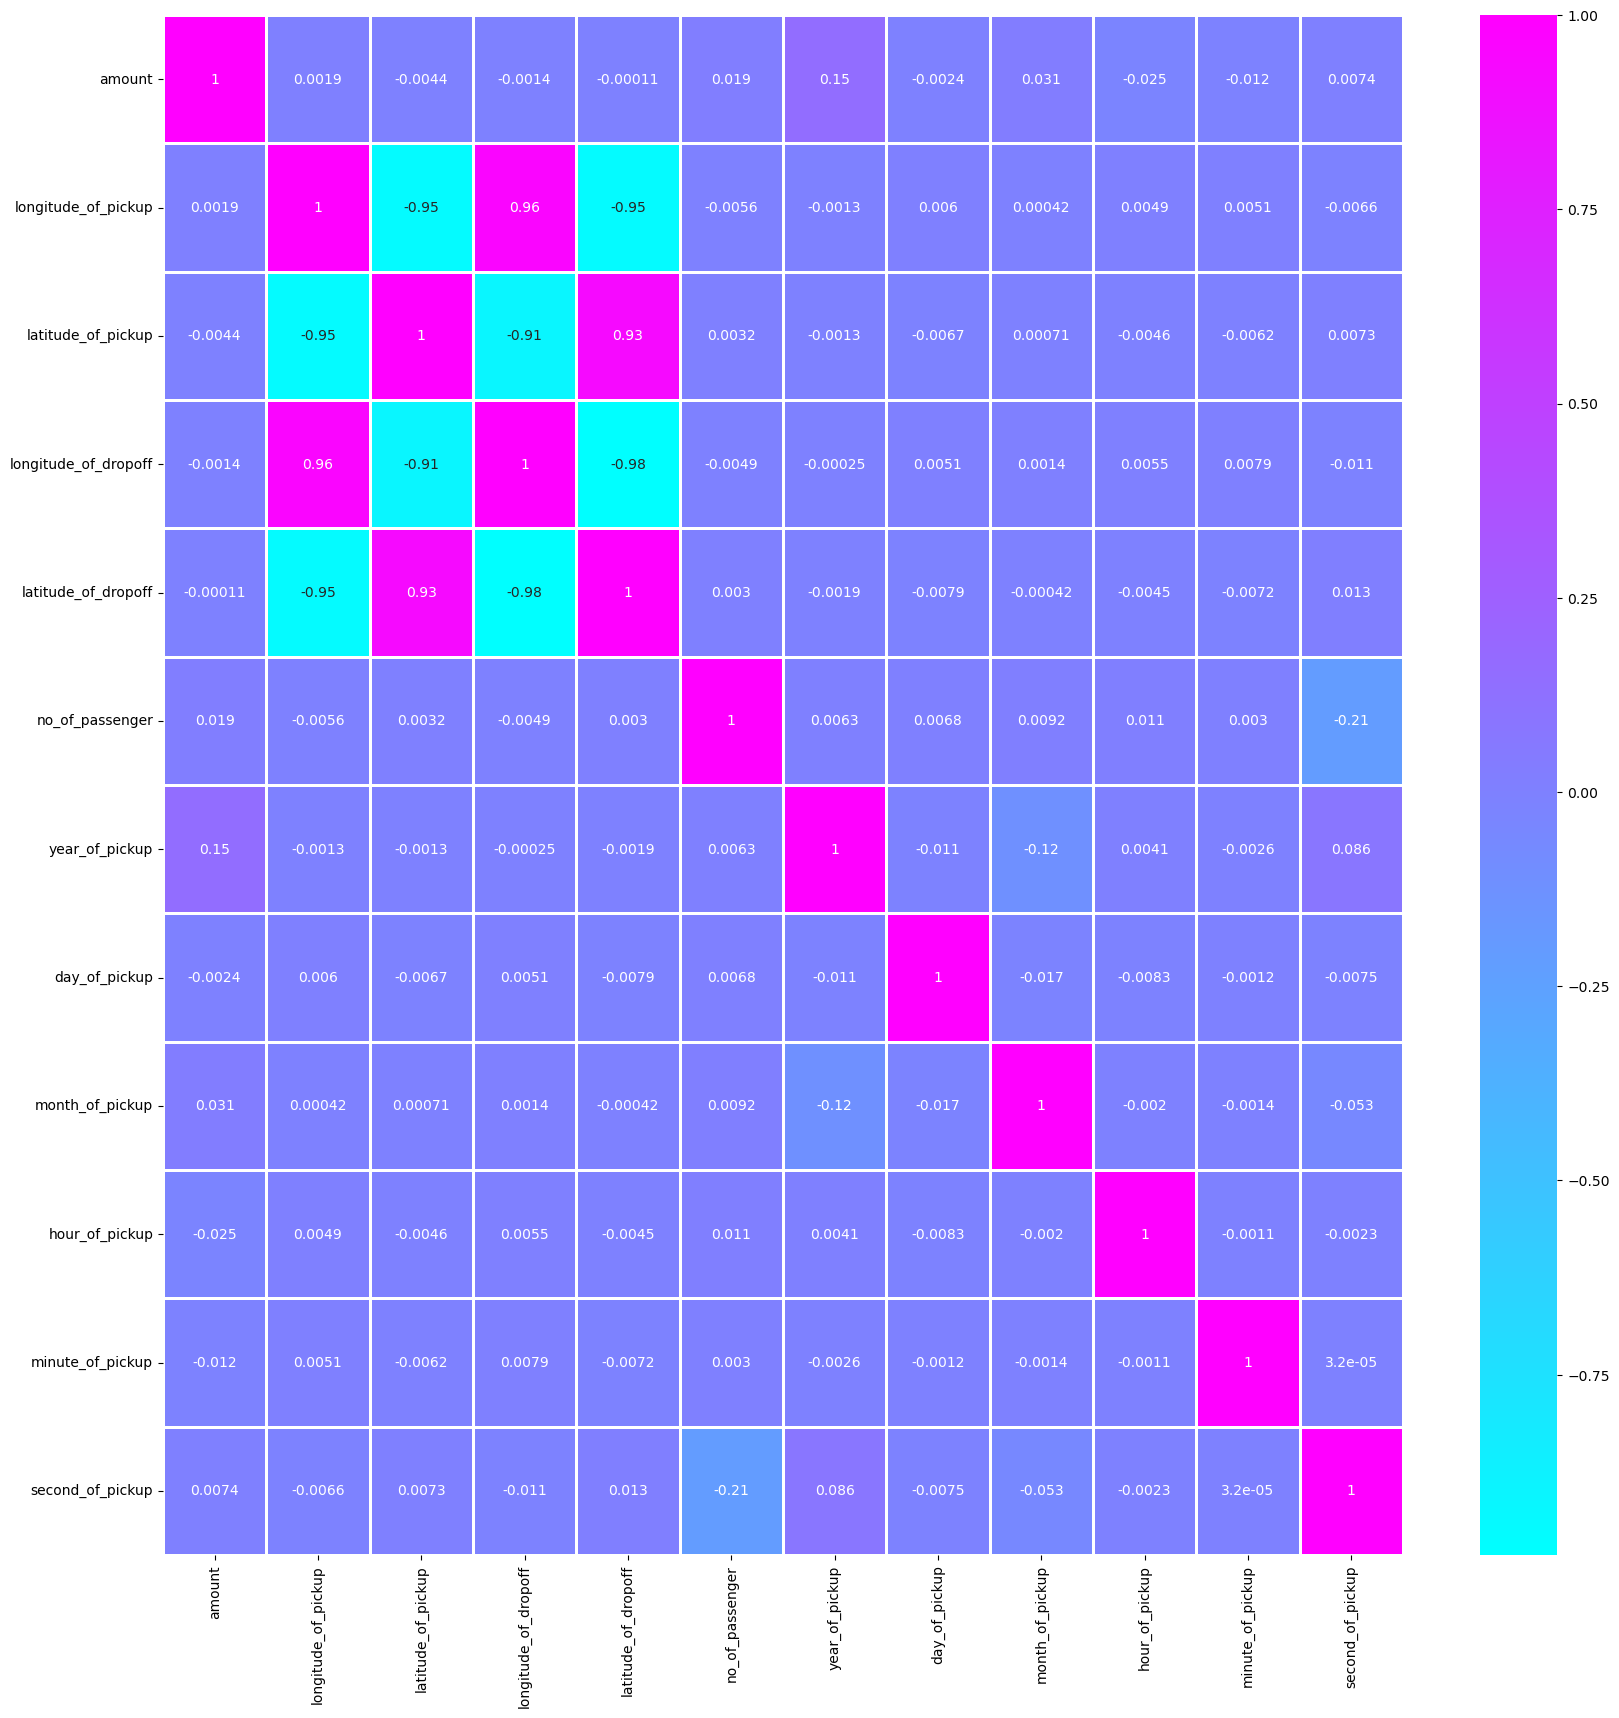

In [91]:
## check correlation between variables
corr = df.corr()
plt.rcParams['figure.figsize']=(20,20)
sns.heatmap(corr,annot=True,linewidths=2,cmap='cool')
plt.show()

- Year of pickoff, no. of passengers and month of pickoff have high correlation with the target column, amount

### Split the dataset into train and test set

In [93]:
X = df.drop(['amount'],axis=1)
Y = df['amount']

In [94]:
# split the X and Y
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [95]:
print(x_train.shape)
print(x_test.shape)

(40000, 11)
(10000, 11)


In [96]:
print(y_train.shape)
print(y_test.shape)

(40000,)
(10000,)


##### Standardize the data

In [97]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Building Models

In [111]:
# model evaluation function
def evaluate_model(true,pred):
    print('='*35)
    mae = print('MAE:',mean_absolute_error(true,pred))
    mse = print("MSE:",mean_squared_error(true,pred))
    rmse = print("RMSE:",np.sqrt(mean_squared_error(true,pred)))
    r2 =print("R2_Score:",r2_score(true,pred))
    
    return

### Linear Regression

In [112]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred =lr_model.predict(x_test)

print('Train_score:',lr_model.score(x_train,y_train))
print('Test_score:',lr_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)

Train_score: 0.025923454923953093
Test_score: 0.024132267671497676
MAE: 4.31275158748136
MSE: 29.064210243029375
RMSE: 5.39112328212121
R2_Score: 0.024132267671497676


## RandomForest

In [113]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred =rf_model.predict(x_test)

print('Train_score:',rf_model.score(x_train,y_train))
print('Test_score:',rf_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)

Train_score: 0.9703883018512445
Test_score: 0.7787300797352794
MAE: 1.66380569
MSE: 6.590068786973
RMSE: 2.5671129283638847
R2_Score: 0.7787300797352794


## GradientBoosting 

In [114]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train,y_train)
y_pred =gb_model.predict(x_test)

print('Train_score:',gb_model.score(x_train,y_train))
print('Test_score:',gb_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)

Train_score: 0.6680757199193996
Test_score: 0.6420857375298067
MAE: 2.4255328419211057
MSE: 10.65973904946244
RMSE: 3.26492558099912
R2_Score: 0.6420857375298067


## BaggingRegressor

In [115]:
b_model = BaggingRegressor()
b_model.fit(x_train,y_train)
y_pred =b_model.predict(x_test)

print('Train_score:',b_model.score(x_train,y_train))
print('Test_score:',b_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)

Train_score: 0.9570224016098267
Test_score: 0.7527876404880764
MAE: 1.7722572
MSE: 7.3627109018
RMSE: 2.713431573082321
R2_Score: 0.7527876404880764


## Decision Tree

In [116]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
y_pred =tree_model.predict(x_test)

print('Train_score:',tree_model.score(x_train,y_train))
print('Test_score:',tree_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)

Train_score: 1.0
Test_score: 0.5416614859997656
MAE: 2.349044
MSE: 13.65066852
RMSE: 3.6946811120853176
R2_Score: 0.5416614859997656


## SVR

In [117]:
svr_model = SVR()
svr_model.fit(x_train,y_train)
y_pred =svr_model.predict(x_test)

print('Train_score:',svr_model.score(x_train,y_train))
print('Test_score:',svr_model.score(x_test,y_test))
evaluate_model(y_test,y_pred)

Train_score: -0.05038038727996308
Test_score: -0.05284118365573165
MAE: 4.072187879915938
MSE: 31.356705935215135
RMSE: 5.599705879348944
R2_Score: -0.05284118365573165
